<p style="font-size:50px;color:gold">
<b>Intro to Data Science Project</b>
</p>

**_Juan Esteban Alarcón Bravo_**

<br/>

Analyzing organ donation data from Bogotá, Colombia, from 2015 to 2024.

<p style="font-size:30px;color:blue">
<b>Table of Contents</b>

1. [Imports and Cleanup](#1-imports-and-cleanup)
    - [Libraries](#11-libraries)
    - [Data](#12-data)
99. [Exhibits](#x-exhibits)

<br/>

# **1 - Imports and Cleanup**

To begin, we need to import the necessary libraries, load the dataset and perform some data cleaning.

## 1.1 - Libraries

In [2]:
# Import necessary libraries
import pandas as pd

## 1.2 - Data

First, we **import** the data from the CSV file into a pandas `DataFrame` and check the first rows, null values and the column names & data types.

In [3]:
# Load the dataset with encoding='latin1' for Spanish characters and using ";" as delimiter. Using dtype=object to avoid any automatic type conversion
data_path = 'data/raw_trasplantes.csv'
df = pd.read_csv(data_path, encoding='latin1', delimiter=';',dtype=object)

# Display the first few rows to check the data
df.head()

,Año,Proceso,Órgano,Sexo,Grupo de edad,Cantidad,Tipo de donante
0,2015,Donación,Riñón,Hombre,No aplica,39,Donante vivo
1,2015,Donación,Riñón,Mujer,No aplica,32,Donante vivo
2,2015,Donación,Riñón,Hombre,No aplica,70,Donante cadaverico
3,2015,Donación,Riñón,Mujer,No aplica,48,Donante cadaverico
4,2015,Donación,Corazón,Hombre,No aplica,0,Donante vivo


In [4]:
# Display the data types and check for missing values
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2120 entries, 0 to 2119
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Año              2120 non-null   object
 1   Proceso          2120 non-null   object
 2   Órgano           2120 non-null   object
 3   Sexo             2120 non-null   object
 4   Grupo de edad    2120 non-null   object
 5   Cantidad         2120 non-null   object
 6   Tipo de donante  2120 non-null   object
dtypes: object(7)
memory usage: 116.1+ KB


Año                0
Proceso            0
Órgano             0
Sexo               0
Grupo de edad      0
Cantidad           0
Tipo de donante    0
dtype: int64

As there are no null values in the dataset, we do not need to worry about dealing with them. Also, all the columns but `Cantidad` _(Quantity)_ are categorical; our next step is going to be **text standardization** for those categorical columns.

- **Strip** spaces and put the text in **title case**.
- Check the **unique values** in each column to make sure that there are no duplicates or incorrect values (due to typos, etc.).

In [5]:
# Standardize text in categorical columns (Strip + TitleCase)
df['Año'] = df['Año'].str.strip().str.title()
df['Proceso'] = df['Proceso'].str.strip().str.title()
df['Órgano'] = df['Órgano'].str.strip().str.title()
df['Sexo'] = df['Sexo'].str.strip().str.title()
df['Grupo de edad'] = df['Grupo de edad'].str.strip().str.title()
df['Tipo de donante'] = df['Tipo de donante'].str.strip().str.title()

# Display the first few rows to check the data
df.head()

,Año,Proceso,Órgano,Sexo,Grupo de edad,Cantidad,Tipo de donante
0,2015,Donación,Riñón,Hombre,No Aplica,39,Donante Vivo
1,2015,Donación,Riñón,Mujer,No Aplica,32,Donante Vivo
2,2015,Donación,Riñón,Hombre,No Aplica,70,Donante Cadaverico
3,2015,Donación,Riñón,Mujer,No Aplica,48,Donante Cadaverico
4,2015,Donación,Corazón,Hombre,No Aplica,0,Donante Vivo


In [6]:
# Check for unique values in each column
print("Unique values in 'Año':", df['Año'].unique(), "\n")
print("Unique values in 'Proceso':", df['Proceso'].unique(), "\n")
print("Unique values in 'Órgano':", df['Órgano'].unique(), "\n")
print("Unique values in 'Sexo':", df['Sexo'].unique(), "\n")
print("Unique values in 'Grupo de edad':", df['Grupo de edad'].unique(), "\n")
print("Unique values in 'Tipo de donante':", df['Tipo de donante'].unique(), "\n")

Unique values in 'Año': ['2015' '2016' '2017' '2018' '2019' '2020' '2021' '2022' '2023'
 '2024 Ii Trim'] 

Unique values in 'Proceso': ['Donación' 'Lista De Espera De Donación De Órganos' 'Trasplantes'
 'Donación Personas'] 

Unique values in 'Órgano': ['Riñón' 'Corazón' 'Hígado' 'Pulmón' 'Combinado Riñón-Hígado'
 'Tejidos (Córneas)' 'No Aplica' 'Combinado Corazón -Riñón' 'Páncreas'
 'Combinado \nRiñón-Páncreas' 'Combinado Riñón-Pancreas'] 

Unique values in 'Sexo': ['Hombre' 'Mujer' 'No Aplica'] 

Unique values in 'Grupo de edad': ['No Aplica' '0-9 Años' '10-19 Años' '20-29 Años' '30-39 Años'
 '40-49 Años' '50-59 Años' '60-69 Años' '> 70  Años'] 

Unique values in 'Tipo de donante': ['Donante Vivo' 'Donante Cadaverico' 'No Aplica' 'Donante Cadavérico'] 



Some values require attention. In `Año` (_"Year"_), for instance, the year _2024_ includes not only the year itself but also an indication of the trimester (_"2024 Ii Trim"_). This shows a clear bias in the data, as the year 2024 contains fewer observations compared to other years, which represent complete annual data.

<div class="alert alert-block alert-info">
<b>Note:</b> This particular year-bias is going to be important for some of the next steps of the project but, for the time being, we are going to change all the occurrences to "2024".
</div>

As for the other columns, there are some missing and extra characters and accents. We can work on that: 

In [7]:
# Cleanup: 'Año' (Year)
df['Año'] = df['Año'].replace({
    '2024 Ii Trim': '2024'
})

# Cleanup: 'Órgano' (Organ)
df['Órgano'] = df['Órgano'].replace({
    'Combinado Corazón -Riñón': 'Combinado Corazón-Riñón',
    'Combinado \nRiñón-Páncreas': 'Combinado Riñón-Páncreas',
    'Combinado Riñón-Pancreas': 'Combinado Riñón-Páncreas',
    'Tejidos (Córneas)': 'Córneas'
})

# Cleanup: 'Grupo de edad' (Age Group)
df['Grupo de edad'] = df['Grupo de edad'].replace({
    '> 70  Años': '> 70 Años'
})

# Cleanup: 'Tipo de donante' (Donor Type)
df['Tipo de donante'] = df['Tipo de donante'].replace({
    'Donante Cadaverico': 'Donante Cadavérico'
})

In [8]:
# Check unique values in each modified column
print("Unique values in 'Año':", df['Año'].unique(), "\n")
print("Unique values in 'Órgano':", df['Órgano'].unique(), "\n")
print("Unique values in 'Grupo de edad':", df['Grupo de edad'].unique(), "\n")
print("Unique values in 'Tipo de donante':", df['Tipo de donante'].unique(), "\n")

Unique values in 'Año': ['2015' '2016' '2017' '2018' '2019' '2020' '2021' '2022' '2023' '2024'] 

Unique values in 'Órgano': ['Riñón' 'Corazón' 'Hígado' 'Pulmón' 'Combinado Riñón-Hígado' 'Córneas'
 'No Aplica' 'Combinado Corazón-Riñón' 'Páncreas'
 'Combinado Riñón-Páncreas'] 

Unique values in 'Grupo de edad': ['No Aplica' '0-9 Años' '10-19 Años' '20-29 Años' '30-39 Años'
 '40-49 Años' '50-59 Años' '60-69 Años' '> 70 Años'] 

Unique values in 'Tipo de donante': ['Donante Vivo' 'Donante Cadavérico' 'No Aplica'] 



We should also change the data type of `Año` and `Cantidad` to numeric.

In [9]:
#  Change 'Año' to numeric
df['Año'] = pd.to_numeric(df['Año'], errors='coerce')

#  Change 'Cantidad' to numeric
df['Cantidad'] = pd.to_numeric(df['Cantidad'], errors='coerce')

# Check for null values
df.isnull().sum()

Año                0
Proceso            0
Órgano             0
Sexo               0
Grupo de edad      0
Cantidad           0
Tipo de donante    0
dtype: int64

With the categorical cleanup finished, we can work on the remaining column: `Cantidad`. As this column represent a wide range of numerical values, we start by doing some **descriptive statistics** to get a better understanding of the data.

In [ ]:
# SDtatistical description of the Cantidad column
df['Cantidad'].describe()

count    2120.000000
mean       19.068396
std        41.635948
min         0.000000
25%         0.000000
50%         2.000000
75%        15.000000
max       283.000000
Name: Cantidad, dtype: float64

In [28]:
# Print the Median
print(f"Median: {df['Cantidad'].median()}")

# Calculate the IQR and the limits
q1 = df['Cantidad'].quantile(0.25)
q3 = df['Cantidad'].quantile(0.75)
iqr = q3 - q1

lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

print(f"IQR:{iqr}\nLower limit: {lower_limit}\nUpper limit: {upper_limit}")

Median: 2.0
IQR:15.0
Lower limit: -22.5
Upper limit: 37.5


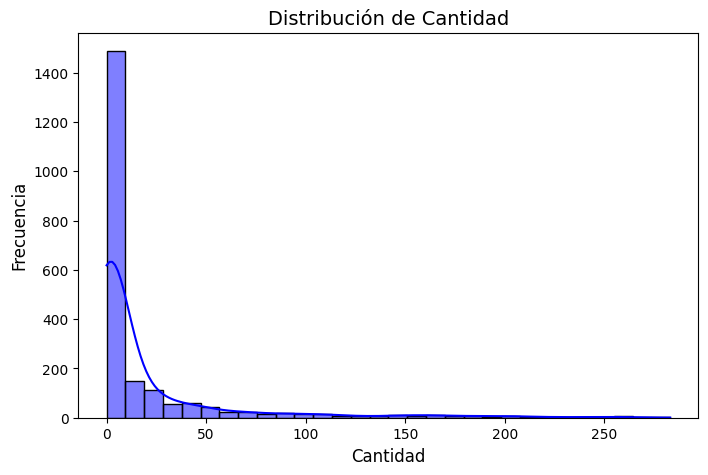

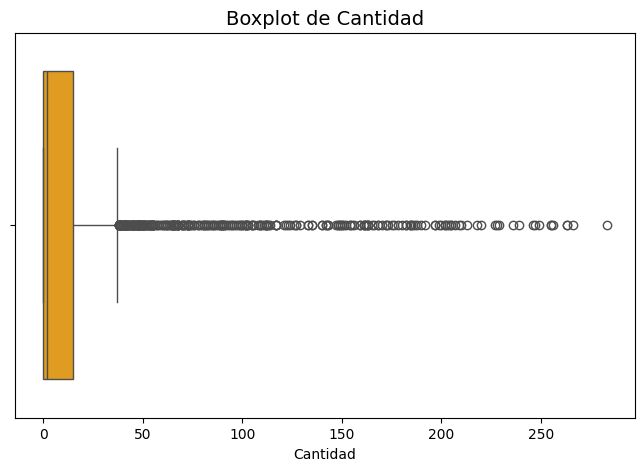

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma de la columna Cantidad
plt.figure(figsize=(8, 5))
sns.histplot(df['Cantidad'], bins=30, kde=True, color='blue')
plt.title('Distribución de Cantidad', fontsize=14)
plt.xlabel('Cantidad', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()

# Boxplot para identificar outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Cantidad'], color='orange')
plt.title('Boxplot de Cantidad', fontsize=14)
plt.show()


<br/>
<br/>
<br/>
<br/>
<br/>

# **x. Exhibits**

Additional tools that come in handy for the project execution.

## x.1 - Python _requirements.txt_ utilities

In [ ]:
# Create requirements.txt file
# !pip freeze > requirements.txt

# Install requirements.txt
# !pip install -r requirements.txt